In [80]:
import pandas as pd

dataset = pd.read_csv('/content/house_price_bd.csv')
dataset.head()

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"


In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [82]:
dataset = dataset.dropna()

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2831 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             2831 non-null   object 
 1   Bedrooms          2831 non-null   float64
 2   Bathrooms         2831 non-null   float64
 3   Floor_no          2831 non-null   object 
 4   Occupancy_status  2831 non-null   object 
 5   Floor_area        2831 non-null   float64
 6   City              2831 non-null   object 
 7   Price_in_taka     2831 non-null   object 
 8   Location          2831 non-null   object 
dtypes: float64(3), object(6)
memory usage: 221.2+ KB


In [84]:
dataset_1 = dataset.drop(columns = ['Title', 'Occupancy_status', 'City', 'Location'])
dataset_1

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka
0,3.0,4.0,3,1960.0,"৳39,000,000"
1,3.0,3.0,1,1705.0,"৳16,900,000"
2,3.0,3.0,6,1370.0,"৳12,500,000"
3,3.0,3.0,4,2125.0,"৳20,000,000"
4,3.0,3.0,4,2687.0,"৳47,500,000"
...,...,...,...,...,...
3860,3.0,3.0,8,1350.0,"৳4,500,000"
3861,2.0,2.0,7,1000.0,"৳4,300,000"
3862,3.0,3.0,9,1240.0,"৳4,960,000"
3863,3.0,3.0,9,1300.0,"৳5,200,000"


In [85]:
dataset_1['Price_in_taka'] = dataset_1['Price_in_taka'].astype(str).str.replace('৳', '').str.replace(',', '').astype(float).astype(int)

In [86]:
dataset_1['Floor_no'] = dataset_1['Floor_no'].astype(str).replace({'G+7':'8','1st':'1','A1,A2,A3,A4,A5,A6,A7':'5','0+7':'7','1F':'1','4th to 8th Backside':'5','5th':'5', '8th':'8'}).str.replace(',', '').astype(float).astype(int)

In [87]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2831 entries, 0 to 3864
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       2831 non-null   float64
 1   Bathrooms      2831 non-null   float64
 2   Floor_no       2831 non-null   int64  
 3   Floor_area     2831 non-null   float64
 4   Price_in_taka  2831 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 132.7 KB


In [88]:
dataset_1.describe()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka
count,2831.000000,2831.000000,2831.00000,2831.000000,2.831000e+03
mean,3.021900,2.953727,4.59237,1477.755917,9.928640e+06
std,1.412043,0.831138,2.65306,1037.072393,9.311410e+06
min,1.000000,1.000000,1.00000,250.000000,1.760000e+06
25%,3.000000,3.000000,2.00000,1150.000000,5.340000e+06
50%,3.000000,3.000000,4.00000,1350.000000,7.370000e+06
75%,3.000000,3.000000,7.00000,1582.000000,1.100000e+07
max,46.000000,10.000000,17.00000,24000.000000,1.300000e+08


<Axes: xlabel='Bedrooms'>

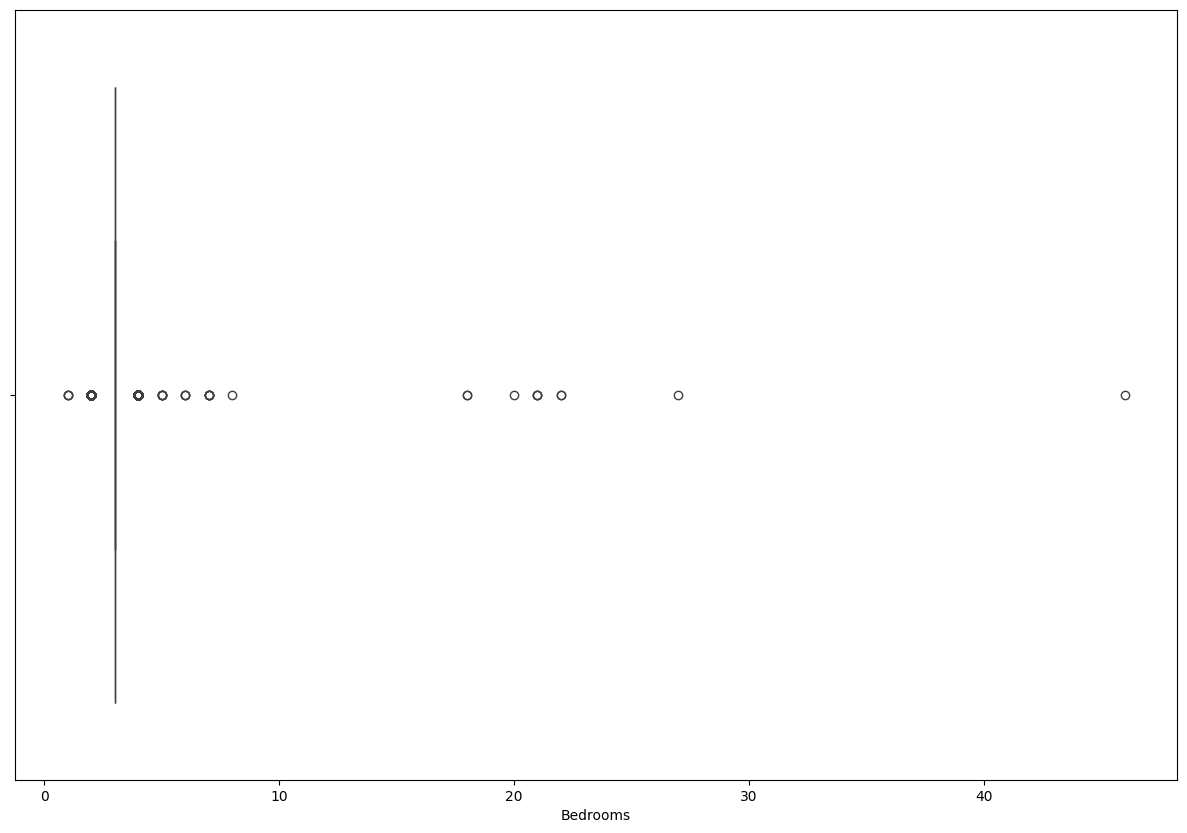

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.boxplot(x=dataset_1['Bedrooms'],data=dataset_1)

In [90]:
q1 = dataset_1['Bedrooms'].quantile(0.25)
q3 = dataset_1['Bedrooms'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [91]:
dataset_1 = dataset_1[(dataset_1['Bedrooms'] >= lower_bound) & (dataset_1['Bedrooms'] <= upper_bound)]

In [92]:
q1 = dataset_1['Floor_no'].quantile(0.25)
q3 = dataset_1['Floor_no'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [93]:
dataset_1 = dataset_1[(dataset_1['Floor_no'] >= lower_bound) & (dataset_1['Floor_no'] <= upper_bound)]

In [94]:
dataset_1.describe()

,Bedrooms,Bathrooms,Floor_no,Floor_area,Price_in_taka
count,2181.0,2181.000000,2181.000000,2181.000000,2.181000e+03
mean,3.0,2.963778,4.619441,1417.605685,9.144166e+06
std,0.0,0.483744,2.663906,308.757713,6.021003e+06
min,3.0,1.000000,1.000000,700.000000,2.000000e+06
25%,3.0,3.000000,2.000000,1226.000000,5.800000e+06
50%,3.0,3.000000,4.000000,1365.000000,7.500000e+06
75%,3.0,3.000000,7.000000,1550.000000,1.100000e+07
max,3.0,5.000000,13.000000,2961.000000,6.750000e+07


<Axes: >

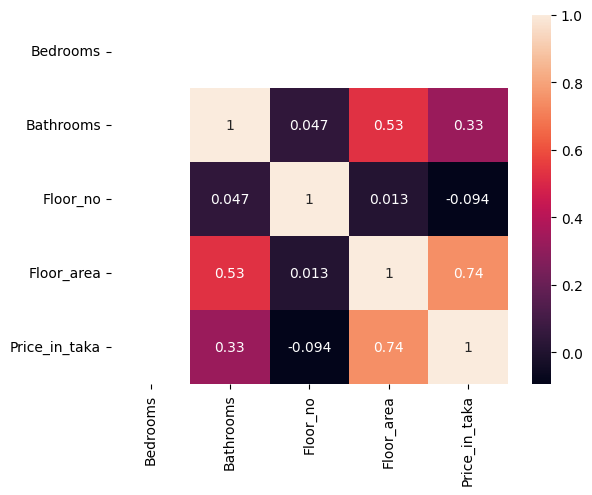

In [95]:
sns.heatmap(data=dataset_1.corr(), annot=True)

In [96]:
x= dataset_1.drop(columns = ['Price_in_taka'])
y = dataset_1['Price_in_taka']

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, random_state=42, test_size = 0.2
)


In [98]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

53.85256623734538

In [99]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(x_test)
error = mse(y_test, predicted) ** .5
print(error)

3067662.85891619


In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

errors = {}

for model in models:
    model.fit(x_train,y_train)
    name = type(model).__name__
    score = model.score(x_test,y_test)*100
    errors[name] = score

errors

{'RandomForestRegressor': 63.04528847552918,
 'DecisionTreeRegressor': 56.66769648723546,
 'LinearRegression': 53.85256623734538}

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Example: degree=3 polynomial regression
model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test,y_test)*100


59.48958892486669

In [102]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(x_train, y_train)
y_pred_reg = knn_reg.predict(x_test)
print(knn_reg.score(x_test,y_test)*100)
# Classification
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train, y_train)
y_pred_clf = knn_clf.predict(x_test)
print(knn_clf.score(x_test,y_test)*100)

57.60701423951773
21.51029748283753


In [103]:
from sklearn.svm import SVR, SVC

# Regression
svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred_reg = svr.predict(x_test)
print(svr.score(x_test,y_test)*100)

# Classification
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
y_pred_clf = svc.predict(x_test)
print(svc.score(x_test,y_test)*100)

-5.84662111424934
4.118993135011442


In [104]:
from xgboost import XGBRegressor, XGBClassifier

# Regression
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_reg.fit(x_train, y_train)
y_pred_reg = xgb_reg.predict(x_test)
print(xgb_reg.score(x_test,y_test)*100)


61.750805377960205


In [105]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print(log_reg.score(x_test,y_test)*100)


2.745995423340961


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print(ridge.score(x_test,y_test)*100)
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print(lasso.score(x_test,y_test)*100)

53.854455002164805
53.852566524869


In [107]:
from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(x_train, y_train)
y_pred = perc.predict(x_test)
perc.score(x_test,y_test)*100


0.0